In [69]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_excel(r"/content/Dataset.xlsx")

In [71]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [72]:
print(df.shape)

(10683, 11)


In [73]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [74]:
# dropping the rows having NaN values
df = df.dropna()
 
# To reset the indices
df = df.reset_index(drop = True)
print(df.shape)

(10682, 11)


In [75]:
df.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


In [76]:
from datetime import date
import calendar

In [77]:
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df["Journey_year"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.year
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [78]:
df['Journey_year'].unique()
# Since the dataset contains information for only one year(2019), we do not need
# the 'Journey_year' column.

array([2019])

In [79]:
# Drop the unnecessary column
df = df.drop(['Journey_year'], axis = 1)

Ticket prices may also depend whether the flight operates during a weekday or weekends, since the costs during rush days could be higher.

In [80]:
df["Weekday"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.strftime('%A')

In [81]:
df["Month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.strftime('%B')

In [82]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Weekday,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday,March
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday,May
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,Sunday,June
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,Sunday,May
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,Friday,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,Tuesday,April
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,Saturday,April
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,Saturday,April
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,Friday,March


Flight ticket prices may also depend on during what time of the day the flight departs and arrives at the destination. Therefore, we will will extract the different parts of the day
from the departure and arrival times:

In [83]:
def Dayparting(X):
    
    if int(X[:2]) >= 20 or int(X[:2]) < 4:
        return 'Night'
    elif int(X[:2]) >= 4 and int(X[:2]) < 12:
        return 'Morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 16:
        return 'Afternoon'
    elif int(X[:2]) >= 16 and int(X[:2]) < 20:
        return 'evening'


In [84]:
df['Dayparting_departure'] = df['Dep_Time'].apply(Dayparting)
df['Dayparting_arrival'] = df['Arrival_Time'].apply(Dayparting)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Weekday,Month,Dayparting_departure,Dayparting_arrival
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday,March,Night,Night
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday,May,Morning,Afternoon
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,Sunday,June,Morning,Morning
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,Sunday,May,evening,Night
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,Friday,March,evening,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,Tuesday,April,evening,Night
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,Saturday,April,Night,Night
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,Saturday,April,Morning,Morning
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,Friday,March,Morning,Afternoon


There is a steep variation in prices, especially during the period of major holidays since these are the peak periods of operation during the whole year.

In [85]:
import holidays

In [86]:
for date in holidays.India(years = 2019).items():
    print(date)

(datetime.date(2019, 1, 14), 'Makar Sankranti / Pongal')
(datetime.date(2019, 1, 26), 'Republic Day')
(datetime.date(2019, 8, 15), 'Independence Day')
(datetime.date(2019, 10, 2), 'Gandhi Jayanti')
(datetime.date(2019, 5, 1), 'Labour Day')
(datetime.date(2019, 12, 25), 'Christmas')


In [87]:
ind_holidays=holidays.India(years = 2019) 
ind_holidays.append({'7-10-2019':'Dasehra'})
ind_holidays.append({'8-10-2019':'Dasehra'})
ind_holidays.append({'9-10-2019':'Dasehra'})

ind_holidays.append({'13-01-2019':'Makar Sankranti / Pongal'})
ind_holidays.append({'15-01-2019':'Makar Sankranti / Pongal'})

ind_holidays.append({'20-03-2019':'Holi'})
ind_holidays.append({'21-03-2019':'Holi'})
ind_holidays.append({'22-03-2019':'Holi'})

ind_holidays.append({'27-10-2019':'Diwali'})
ind_holidays.append({'28-10-2019':'Diwali'})
ind_holidays.append({'29-10-2019':'Diwali'})
ind_holidays.append({'30-10-2019':'Diwali'})
ind_holidays.append({'31-10-2019':'Diwali'})

ind_holidays.append({'31-12-2019':'NewYear'})

ind_holidays.append({'24-12-2019':'Christmas'})
ind_holidays.append({'26-12-2019':'Christmas'})

In [88]:
India_Holidays = []

for date in  ind_holidays.items():
    India_Holidays.append(str(date[0]))

In [89]:
for date in India_Holidays:
    print(date)

2019-01-14
2019-01-26
2019-08-15
2019-10-02
2019-05-01
2019-12-25
2019-07-10
2019-08-10
2019-09-10
2019-01-13
2019-01-15
2019-03-20
2019-03-21
2019-03-22
2019-10-27
2019-10-28
2019-10-29
2019-10-30
2019-10-31
2019-12-31
2019-12-24
2019-12-26


In [90]:
for i in range(len(India_Holidays)):
    India_Holidays[i] = India_Holidays[i].replace("-","/")

In [91]:
print(India_Holidays)

['2019/01/14', '2019/01/26', '2019/08/15', '2019/10/02', '2019/05/01', '2019/12/25', '2019/07/10', '2019/08/10', '2019/09/10', '2019/01/13', '2019/01/15', '2019/03/20', '2019/03/21', '2019/03/22', '2019/10/27', '2019/10/28', '2019/10/29', '2019/10/30', '2019/10/31', '2019/12/31', '2019/12/24', '2019/12/26']


In [92]:
India_Holidays = ['14/01/2019', '26/01/2019', '15/08/2019', '2/10/2019', '1/05/2019', '25/12/2019', '10/07/2019', '10/08/2019',
                  '02/10/2019', '01/05/2019',
                  '10/09/2019', '13/01/2019', '15/01/2019', '20/03/2019', '21/03/2019', '22/03/2019', '27/10/2019', '28/10/2019',
                  '29/10/2019', '30/10/2019', '31/10/2019', '31/12/2019', '24/12/2019', '26/12/2019',
                  '9/03/2019','6/03/2019','1/03/2019',
                  '09/03/2019','06/03/2019','01/03/2019']

In [93]:
df['Date_of_Journey'][0]

'24/03/2019'

In [94]:
df['Is_Holiday'] = ['Yes' if str(val).split()[0] in India_Holidays else 'No' for val in df['Date_of_Journey'] ]

In [95]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Weekday,Month,Dayparting_departure,Dayparting_arrival,Is_Holiday
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,Sunday,March,Night,Night,No
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,Wednesday,May,Morning,Afternoon,Yes
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,Sunday,June,Morning,Morning,No
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,Sunday,May,evening,Night,No
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,Friday,March,evening,Night,Yes


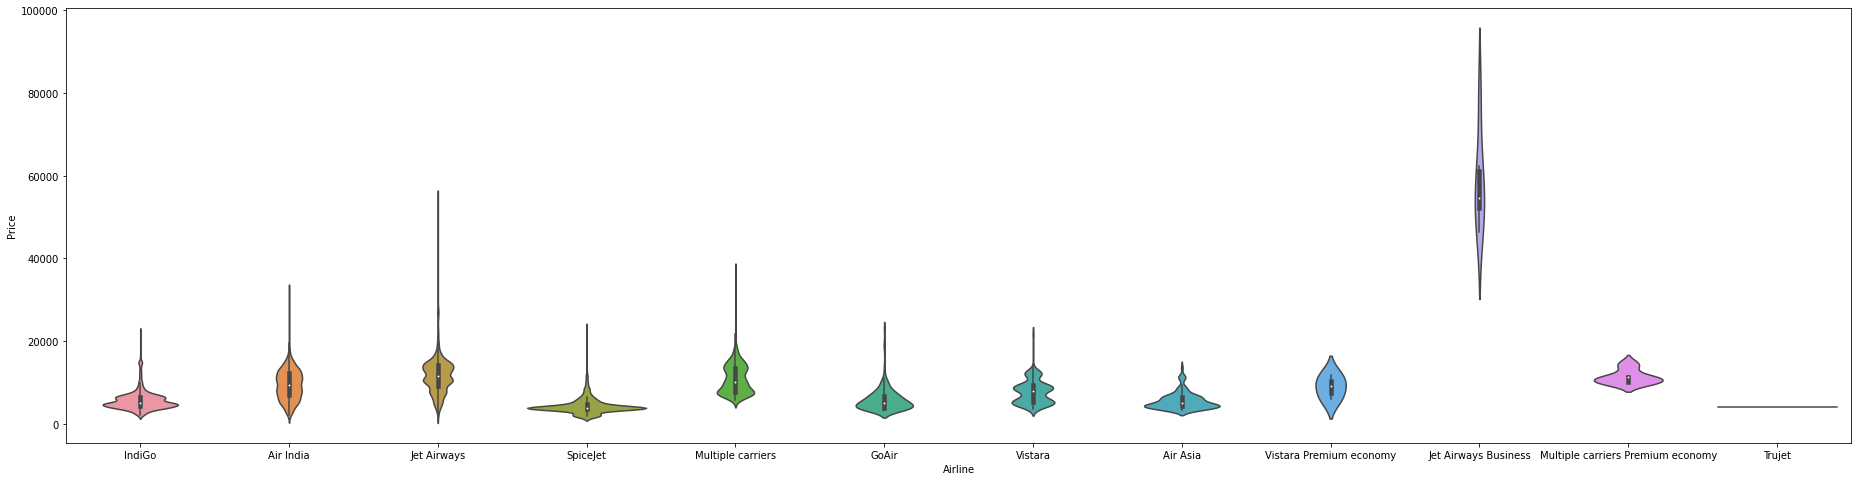

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 32,8

ax = sns.violinplot(x="Airline", y="Price", data=df, palatte = 'bright')

Inorder to observe the variations clearly, we will remove the flights
corresponding to Jet Airways Business class since they are outliers in the data.

In [97]:
df_without_businessclass = df

df_without_businessclass.drop(df_without_businessclass.index[df_without_businessclass['Airline'] == 'Jet Airways Business'], inplace=True)

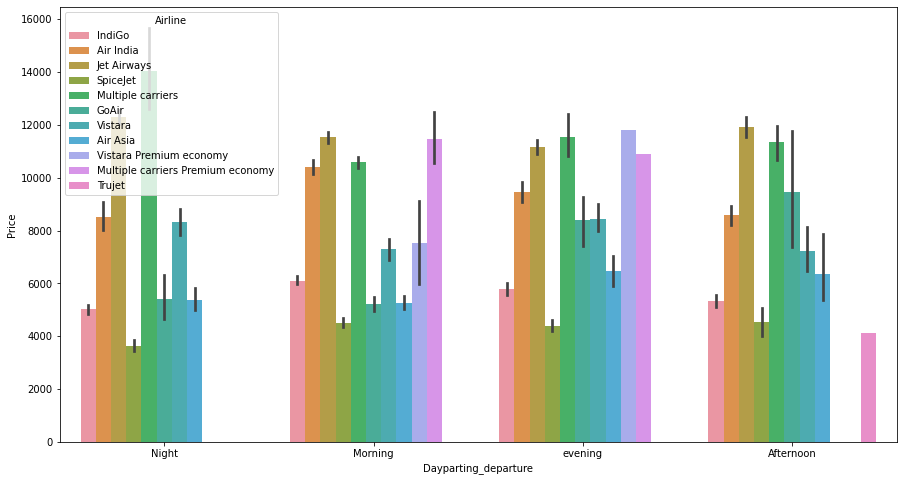

In [98]:
rcParams['figure.figsize'] = 15,8

ax = sns.barplot(x="Dayparting_departure", y="Price", hue="Airline",
                 data=df_without_businessclass)




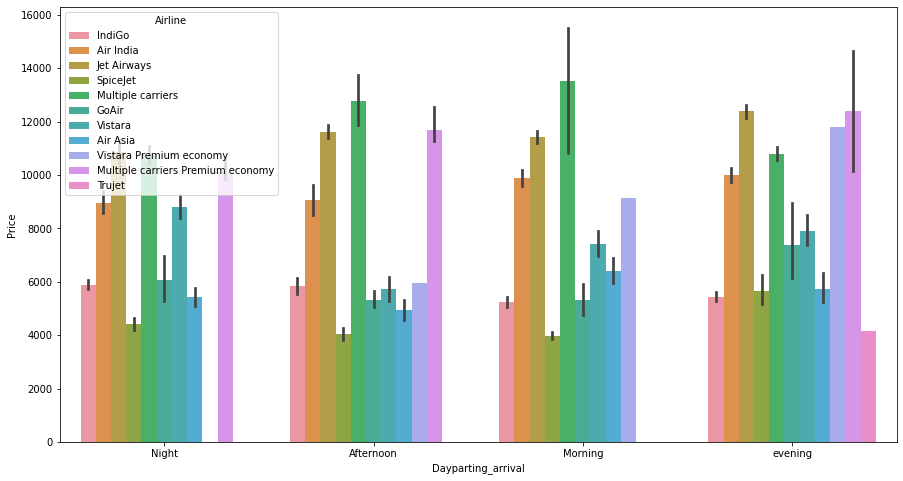

In [99]:
rcParams['figure.figsize'] = 15,8

ax = sns.barplot(x="Dayparting_arrival", y="Price", hue="Airline",
                 data=df_without_businessclass)

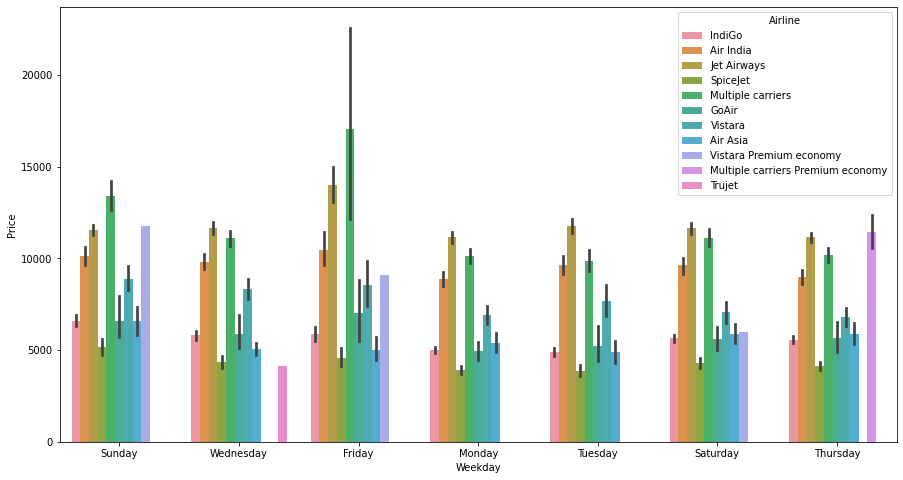

In [100]:
rcParams['figure.figsize'] = 15,8

ax = sns.barplot(x="Weekday", y="Price", hue="Airline",
                 data=df_without_businessclass)

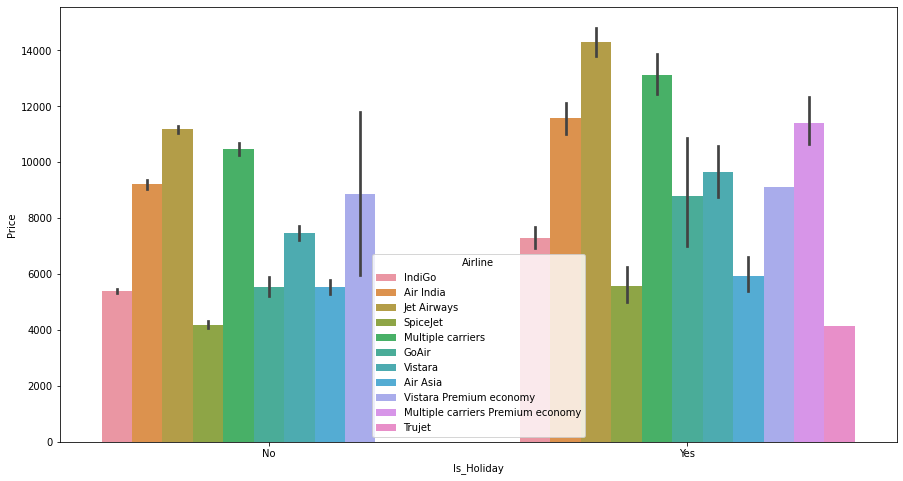

In [101]:
rcParams['figure.figsize'] = 15,8

ax = sns.barplot(x="Is_Holiday", y="Price", hue="Airline",
                 data=df_without_businessclass)

In [102]:
(df['Is_Holiday'] == 'Yes').sum() 

1599

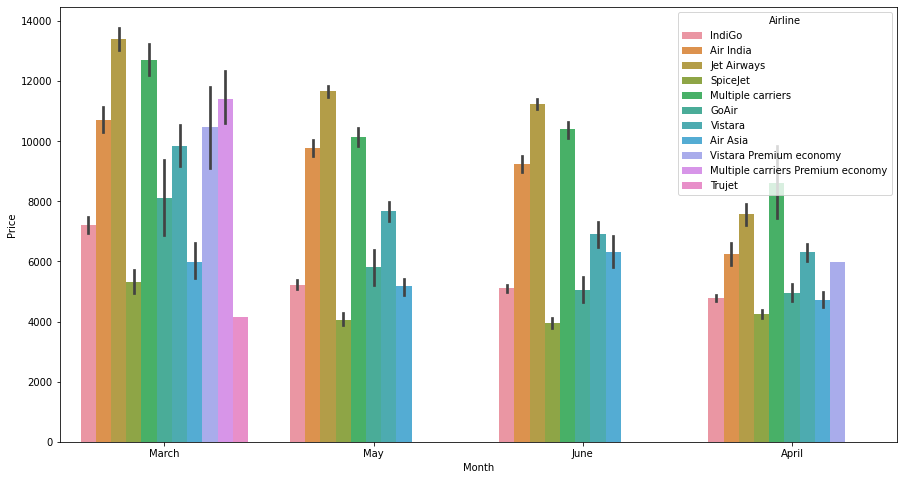

In [103]:
rcParams['figure.figsize'] = 15,8

ax = sns.barplot(x="Month", y="Price", hue="Airline",
                 data=df_without_businessclass)

Flight prices also depend on number of stops

In [104]:
def number_of_stops(value):
    if value == '4 stops':
        return 4
    elif value == '3 stops':
        return 3
    elif value == '2 stops':
        return 2
    elif value == '1 stop':
        return 1
    elif value == 'non-stop':
        return 0
    else:
        return 0



In [105]:
df['Total_Stops'] = df['Total_Stops'].map(number_of_stops)

df_without_businessclass = df

df_without_businessclass.drop(df_without_businessclass.index[df_without_businessclass['Airline'] == 'Jet Airways Business'], inplace=True)

In [106]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Weekday,Month,Dayparting_departure,Dayparting_arrival,Is_Holiday
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,Sunday,March,Night,Night,No
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,Wednesday,May,Morning,Afternoon,Yes
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,Sunday,June,Morning,Morning,No
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,Sunday,May,evening,Night,No
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,Friday,March,evening,Night,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,9,4,Tuesday,April,evening,Night,No
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,27,4,Saturday,April,Night,Night,No
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,27,4,Saturday,April,Morning,Morning,No
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,1,3,Friday,March,Morning,Afternoon,Yes


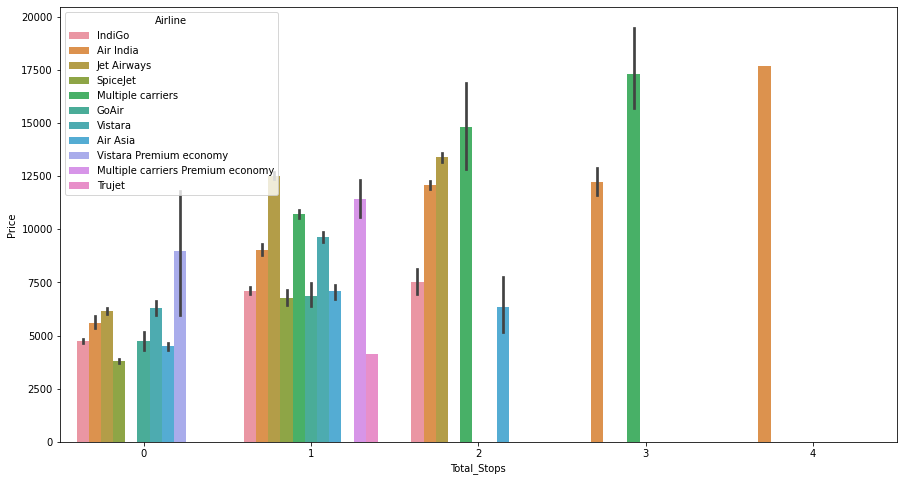

In [107]:
rcParams['figure.figsize'] = 15,8

ax = sns.barplot(x="Total_Stops", y="Price", hue="Airline",
                 data=df_without_businessclass)

Variation of prices according to routes:

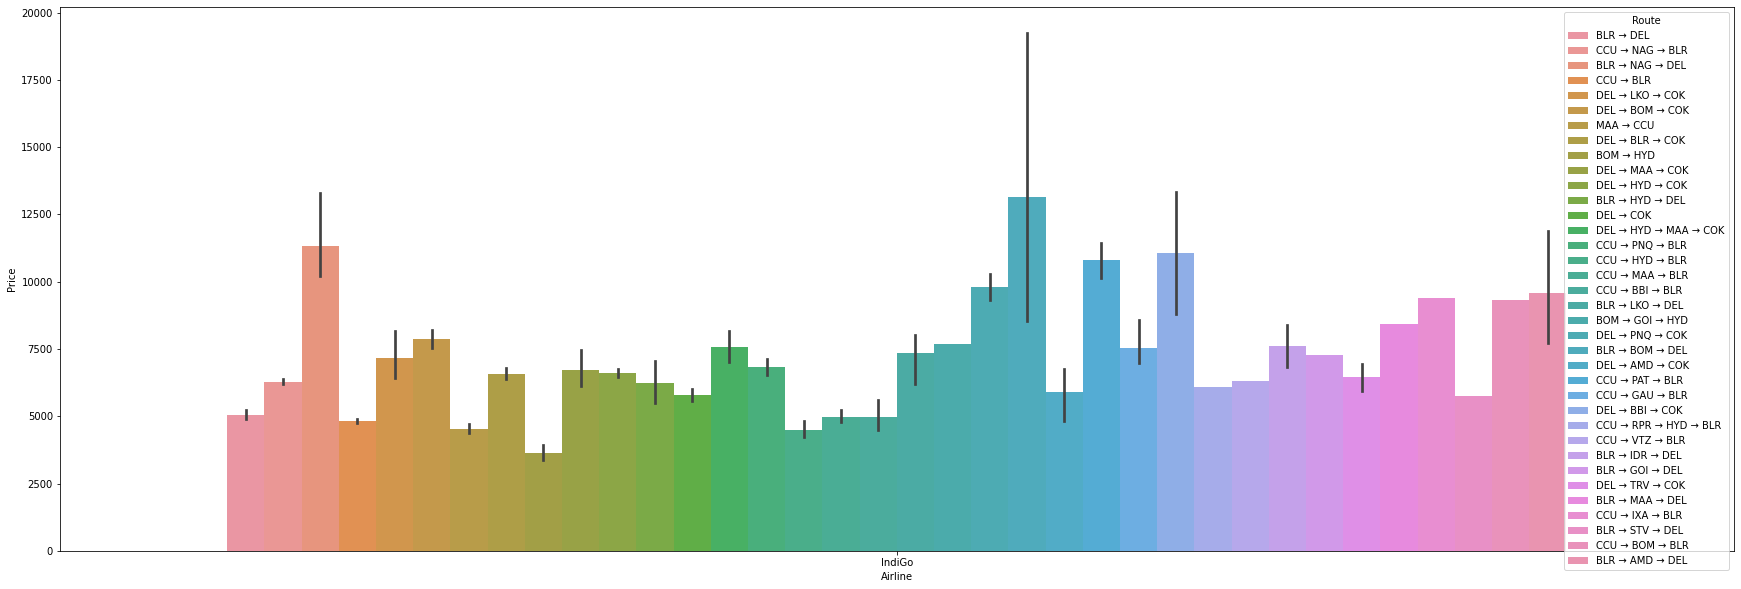

In [108]:
df_indigo = df[df['Airline'] == 'IndiGo']
df_indigo

rcParams['figure.figsize'] = 30,10

ax = sns.barplot(x="Airline", y="Price", hue="Route",
                 data=df_indigo)


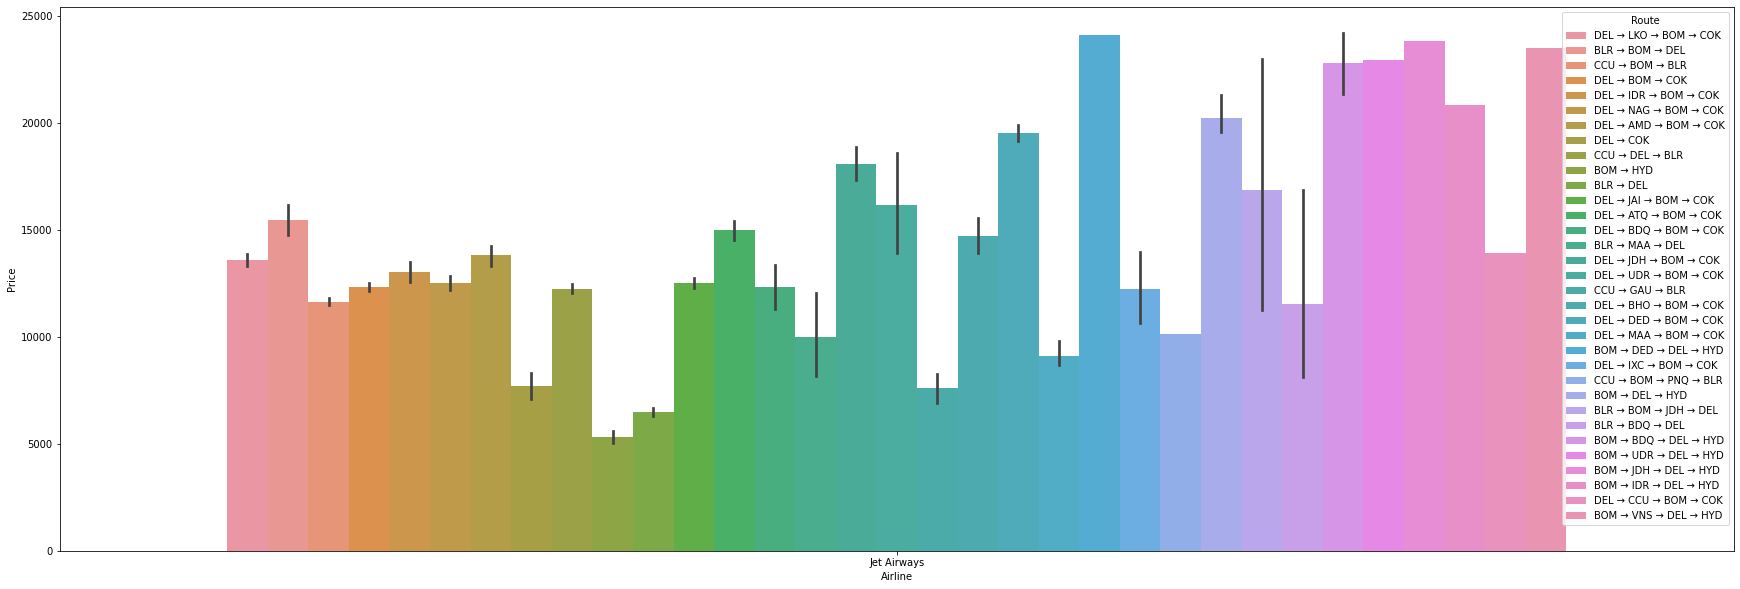

In [109]:
df_jet_airways = df[df['Airline'] == 'Jet Airways']


rcParams['figure.figsize'] = 30,10

ax = sns.barplot(x="Airline", y="Price", hue="Route",
                 data=df_jet_airways)

Thus we observe that there is a huge variation in flight prices depending on the route which the flight takes.

Converting flight duration to seconds: 

In [110]:
import re

def convert_into_seconds(X):
    
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df['Duration(sec)'] = df['Duration'].map(convert_into_seconds)

Dropping duplicate rows:

In [111]:
df = df.drop_duplicates()
df.shape

(10456, 19)

Handling typos:

In [112]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [113]:
# Since 'No Info' and 'No info' are same:
df['Additional_Info'].replace('No Info', 'No info', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Since all the categorical features are ordinal type, we will create dummy variables for each such attribute:

In [114]:
df = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination', 'Additional_Info',
                                   'Weekday','Month', 'Dayparting_departure','Dayparting_arrival',
                                   'Is_Holiday','Route'])

In [115]:
pd.set_option('display.max_columns',1000)
df

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Duration(sec),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Month_April,Month_June,Month_March,Month_May,Dayparting_departure_Afternoon,Dayparting_departure_Morning,Dayparting_departure_Night,Dayparting_departure_evening,Dayparting_arrival_Afternoon,Dayparting_arrival_Morning,Dayparting_arrival_Night,Dayparting_arrival_evening,Is_Holiday_No,Is_Holiday_Yes,Route_BLR → AMD → DEL,Route_BLR → BBI → DEL,Route_BLR → BDQ → DEL,Route_BLR → BOM → AMD → DEL,Route_BLR → BOM → BHO → DEL,Route_BLR → BOM → DEL,Route_BLR → BOM → IDR → DEL,Route_BLR → BOM → IDR → GWL → DEL,Route_BLR → BOM → IXC → DEL,Route_BLR → BOM → JDH → DEL,Route_BLR → BOM → NAG → DEL,Route_BLR → BOM → UDR → DEL,Route_BLR → CCU → BBI → DEL,Route_BLR → CCU → BBI → HYD → DEL,Route_BLR → CCU → BBI → HYD → VGA → DEL,Route_BLR → CCU → DEL,Route_BLR → CCU → GAU → DEL,Route_BLR → COK → DEL,Route_BLR → DEL,Route_BLR → GAU → DEL,Route_BLR → GOI → DEL,Route_BLR → HBX → BOM → AMD → DEL,Route_BLR → HBX → BOM → BHO → DEL,Route_BLR → HBX → BOM → NAG → DEL,Route_BLR → HYD → DEL,Route_BLR → HYD → VGA → DEL,Route_BLR → IDR → DEL,Route_BLR → LKO → DEL,Route_BLR → MAA → DEL,Route_BLR → NAG → DEL,Route_BLR → PNQ → DEL,Route_BLR → STV → DEL,Route_BLR → TRV → COK → DEL,Route_BLR → VGA → DEL,Route_BLR → VGA → HYD → DEL,Route_BLR → VGA → VTZ → DEL,Route_BOM → AMD → ISK → HYD,Route_BOM → BBI → HYD,Route_BOM → BDQ → DEL → HYD,Route_BOM → BHO → DEL → HYD,Route_BOM → BLR → CCU → BBI → HYD,Route_BOM → BLR → HYD,Route_BOM → CCU → HYD,Route_BOM → COK → MAA → HYD,Route_BOM → DED → DEL → HYD,Route_BOM → DEL → HYD,Route_BOM → GOI → HYD,Route_BOM → GOI → PNQ → HYD,Route_BOM → HYD,Route_BOM → IDR → DEL → HYD,Route_BOM → JAI → DEL → HYD,Route_BOM → JDH → DEL → HYD,Route_BOM → JDH → JAI → DEL → HYD,Route_BOM → JLR → HYD,Route_BOM → MAA → HYD,Route_BOM → NDC → HYD,Route_BOM → RPR → VTZ → HYD,Route_BOM → UDR → DEL → HYD,Route_BOM → VNS → DEL → HYD,Route_CCU → AMD → BLR,Route_CCU → BBI → BLR,Route_CCU → BBI → BOM → BLR,Route_CCU → BBI → HYD → BLR,Route_CCU → BBI → IXR → DEL → BLR,Route_CCU → BLR,Route_CCU → BOM → AMD → BLR,Route_CCU → BOM → BLR,Route_CCU → BOM → COK → BLR,Route_CCU → BOM → GOI → BLR,Route_CCU → BOM → HBX → BLR,Route_CCU → BOM → PNQ → BLR,Route_CCU → BOM → TRV → BLR,Route_CCU → DEL → AMD → BLR,Route_CCU → DEL → BLR,Route_CCU → DEL → COK → BLR,Route_CCU → DEL → COK → TRV → BLR,Route_CCU → DEL → VGA → BLR,Route_CCU → GAU → BLR,Route_CCU → GAU → DEL → BLR,Route_CCU → GAU → IMF → DEL → BLR,Route_CCU → HYD → BLR,Route_CCU → IXA → BLR,Route_CCU → IXB → BLR,Route_CCU → IXB → DEL → BLR,Route_CCU → IXR → BBI → BLR,Route_CCU → IXR → DEL → BLR,Route_CCU → IXZ → MAA → BLR,Route_CCU → JAI → BOM → BLR,Route_CCU → JAI → DEL → BLR,Route_CCU → KNU → BLR,Route_CCU → MAA → BLR,Route_CCU → NAG → BLR,Route_CCU → PAT → BLR,Route_CCU → PNQ → BLR,Route_CCU → RPR → HYD → BLR,Route_CCU → VNS → DEL → BLR,Route_CCU → VTZ → BLR,Route_DEL → AMD → BOM → COK,Route_DEL → AMD → COK,Route_DEL → ATQ → BOM → COK,Route_DEL → BBI → COK,Route_DEL → BDQ → BOM → COK,Route_DEL → BHO → BOM → COK,Route_DEL → BLR → COK,Route_DEL → BOM → COK,Route_DEL → CCU → BOM → COK,Rou

In [116]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

In [117]:
df

,Total_Stops,Price,Journey_day,Journey_month,Duration(sec),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Month_April,Month_June,Month_March,Month_May,Dayparting_departure_Afternoon,Dayparting_departure_Morning,Dayparting_departure_Night,Dayparting_departure_evening,Dayparting_arrival_Afternoon,Dayparting_arrival_Morning,Dayparting_arrival_Night,Dayparting_arrival_evening,Is_Holiday_No,Is_Holiday_Yes,Route_BLR → AMD → DEL,Route_BLR → BBI → DEL,Route_BLR → BDQ → DEL,Route_BLR → BOM → AMD → DEL,Route_BLR → BOM → BHO → DEL,Route_BLR → BOM → DEL,Route_BLR → BOM → IDR → DEL,Route_BLR → BOM → IDR → GWL → DEL,Route_BLR → BOM → IXC → DEL,Route_BLR → BOM → JDH → DEL,Route_BLR → BOM → NAG → DEL,Route_BLR → BOM → UDR → DEL,Route_BLR → CCU → BBI → DEL,Route_BLR → CCU → BBI → HYD → DEL,Route_BLR → CCU → BBI → HYD → VGA → DEL,Route_BLR → CCU → DEL,Route_BLR → CCU → GAU → DEL,Route_BLR → COK → DEL,Route_BLR → DEL,Route_BLR → GAU → DEL,Route_BLR → GOI → DEL,Route_BLR → HBX → BOM → AMD → DEL,Route_BLR → HBX → BOM → BHO → DEL,Route_BLR → HBX → BOM → NAG → DEL,Route_BLR → HYD → DEL,Route_BLR → HYD → VGA → DEL,Route_BLR → IDR → DEL,Route_BLR → LKO → DEL,Route_BLR → MAA → DEL,Route_BLR → NAG → DEL,Route_BLR → PNQ → DEL,Route_BLR → STV → DEL,Route_BLR → TRV → COK → DEL,Route_BLR → VGA → DEL,Route_BLR → VGA → HYD → DEL,Route_BLR → VGA → VTZ → DEL,Route_BOM → AMD → ISK → HYD,Route_BOM → BBI → HYD,Route_BOM → BDQ → DEL → HYD,Route_BOM → BHO → DEL → HYD,Route_BOM → BLR → CCU → BBI → HYD,Route_BOM → BLR → HYD,Route_BOM → CCU → HYD,Route_BOM → COK → MAA → HYD,Route_BOM → DED → DEL → HYD,Route_BOM → DEL → HYD,Route_BOM → GOI → HYD,Route_BOM → GOI → PNQ → HYD,Route_BOM → HYD,Route_BOM → IDR → DEL → HYD,Route_BOM → JAI → DEL → HYD,Route_BOM → JDH → DEL → HYD,Route_BOM → JDH → JAI → DEL → HYD,Route_BOM → JLR → HYD,Route_BOM → MAA → HYD,Route_BOM → NDC → HYD,Route_BOM → RPR → VTZ → HYD,Route_BOM → UDR → DEL → HYD,Route_BOM → VNS → DEL → HYD,Route_CCU → AMD → BLR,Route_CCU → BBI → BLR,Route_CCU → BBI → BOM → BLR,Route_CCU → BBI → HYD → BLR,Route_CCU → BBI → IXR → DEL → BLR,Route_CCU → BLR,Route_CCU → BOM → AMD → BLR,Route_CCU → BOM → BLR,Route_CCU → BOM → COK → BLR,Route_CCU → BOM → GOI → BLR,Route_CCU → BOM → HBX → BLR,Route_CCU → BOM → PNQ → BLR,Route_CCU → BOM → TRV → BLR,Route_CCU → DEL → AMD → BLR,Route_CCU → DEL → BLR,Route_CCU → DEL → COK → BLR,Route_CCU → DEL → COK → TRV → BLR,Route_CCU → DEL → VGA → BLR,Route_CCU → GAU → BLR,Route_CCU → GAU → DEL → BLR,Route_CCU → GAU → IMF → DEL → BLR,Route_CCU → HYD → BLR,Route_CCU → IXA → BLR,Route_CCU → IXB → BLR,Route_CCU → IXB → DEL → BLR,Route_CCU → IXR → BBI → BLR,Route_CCU → IXR → DEL → BLR,Route_CCU → IXZ → MAA → BLR,Route_CCU → JAI → BOM → BLR,Route_CCU → JAI → DEL → BLR,Route_CCU → KNU → BLR,Route_CCU → MAA → BLR,Route_CCU → NAG → BLR,Route_CCU → PAT → BLR,Route_CCU → PNQ → BLR,Route_CCU → RPR → HYD → BLR,Route_CCU → VNS → DEL → BLR,Route_CCU → VTZ → BLR,Route_DEL → AMD → BOM → COK,Route_DEL → AMD → COK,Route_DEL → ATQ → BOM → COK,Route_DEL → BBI → COK,Route_DEL → BDQ → BOM → COK,Route_DEL → BHO → BOM → COK,Route_DEL → BLR → COK,Route_DEL → BOM → COK,Route_DEL → CCU → BOM → COK,Route_DEL → COK,Route_DEL → DED → BOM → COK,Route_

Splitting the dataset:

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [119]:
X = df.drop('Price', axis=1)
y = df['Price']

In [120]:
s = StandardScaler()
X = s.fit_transform(X)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8364, 184), (2092, 184), (8364,), (2092,))

Testing on different ML models:

1. Decision Tree Regressor:

In [122]:
depth  = list(range(2,40))

param_grid = dict(max_depth =depth)

model1 = GridSearchCV(DecisionTreeRegressor(),param_grid,cv = 5)
model1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...]})

In [123]:
y_train_pred = model1.predict(X_train) 
y_test_pred = model1.predict(X_test) 

print("Train Results for Decision Tree Regressor :")
train_mse1 = sqrt(mse(y_train.values, y_train_pred))
train_r2_1 = r2_score(y_train.values, y_train_pred)

print("Root mean squared error : ", sqrt(mse(y_train.values, y_train_pred)))
print("R2 Score : ", r2_score(y_train.values, y_train_pred))


print('------------------------------------------------------------------')


print("Test Results for Decision Tree Regressor :")
test_mse1 = sqrt(mse(y_test, y_test_pred))
test_r2_1 = r2_score(y_test, y_test_pred)

print("Root mean squared error : ", sqrt(mse(y_test, y_test_pred)))
print("R2 Score : ", r2_score(y_test, y_test_pred))

Train Results for Decision Tree Regressor :
Root mean squared error :  883.4033653644155
R2 Score :  0.9599424733880473
------------------------------------------------------------------
Test Results for Decision Tree Regressor :
Root mean squared error :  2168.1298569832265
R2 Score :  0.7837086716428863


2. Gradient Boosting Regressor

In [124]:
tuned_params = {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']}

model2 = RandomizedSearchCV(GradientBoostingRegressor(), tuned_params, n_iter=20, cv=5)
model2.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-pac

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=20,
                   param_distributions={'criterion': ['friedman_mse', 'mse'],
                                        'learning_rate': [0.5, 0.8, 0.1, 0.2,
                                                          0.25, 0.3],
                                        'n_estimators': [300, 500, 700, 1000,
                                                         2100]})

In [125]:
y_train_pred = model2.predict(X_train) 
y_test_pred = model2.predict(X_test) 

print("Train Results for Gradient Boosting Regressor :")

train_mse2 = sqrt(mse(y_train.values, y_train_pred))
train_r2_2 = r2_score(y_train.values, y_train_pred)
print("Root mean squared error : ", sqrt(mse(y_train.values, y_train_pred)))
print("R2 Score : ", r2_score(y_train.values, y_train_pred))


print('------------------------------------------------------------------')


print("Test Results for Gradient Boosting Regressor :")

test_mse2 = sqrt(mse(y_test, y_test_pred))
test_r2_2 = r2_score(y_test, y_test_pred)
print("Root mean squared error : ", sqrt(mse(y_test, y_test_pred)))
print("R2 Score : ", r2_score(y_test, y_test_pred))

Train Results for Gradient Boosting Regressor :
Root mean squared error :  1077.648077167441
R2 Score :  0.9403898866296702
------------------------------------------------------------------
Test Results for Gradient Boosting Regressor :
Root mean squared error :  1470.5236463257665
R2 Score :  0.9005024120454503


3. Random Forest Regressor:

In [126]:
tuned_params = {'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]}

model3 = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5)
model3.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [3, 5, 7, 9, 11, 13, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [300, 500, 700, 1000,
                                                         2100]},
                   scoring='neg_mean_absolute_error')

In [127]:
y_train_pred = model3.predict(X_train) 
y_test_pred = model3.predict(X_test) 

print("Train Results for Random Forest Regressor :")

train_mse3 = sqrt(mse(y_train.values, y_train_pred))
train_r2_3 = r2_score(y_train.values, y_train_pred)
print("Root mean squared error : ", sqrt(mse(y_train.values, y_train_pred)))
print("R2 Score : ", r2_score(y_train.values, y_train_pred))


print('------------------------------------------------------------------')


print("Test Results for Random Forest Regressor :")

test_mse3 = sqrt(mse(y_test, y_test_pred))
test_r2_3 = r2_score(y_test, y_test_pred)
print("Root mean squared error : ", sqrt(mse(y_test, y_test_pred)))
print("R2 Score : ", r2_score(y_test, y_test_pred))

Train Results for Random Forest Regressor :
Root mean squared error :  833.8592787088206
R2 Score :  0.9643095879056247
------------------------------------------------------------------
Test Results for Random Forest Regressor :
Root mean squared error :  1592.0586578489242
R2 Score :  0.8833763425099678


4. AdaBoost Regressor:

In [128]:
tuned_params = {'n_estimators' : [100, 300, 500, 700, 1000, 1500, 2100],
                'learning_rate' : [0.10, 0.20, 0.25, 0.30, 0.50, 0.80]}

model4 = RandomizedSearchCV(AdaBoostRegressor(), tuned_params, n_iter=20, cv=5)
model4.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=20,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.25, 0.3,
                                                          0.5, 0.8],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000, 1500, 2100]})

In [129]:
y_train_pred = model4.predict(X_train) 
y_test_pred = model4.predict(X_test) 

print("Train Results for AdaBoost Regressor :")

train_mse4 = sqrt(mse(y_train.values, y_train_pred))
train_r2_4 = r2_score(y_train.values, y_train_pred)
print("Root mean squared error : ", sqrt(mse(y_train.values, y_train_pred)))
print("R2 Score : ", r2_score(y_train.values, y_train_pred))

print('------------------------------------------------------------------')

print("Test Results for AdaBoost Regressor :")

test_mse4 = sqrt(mse(y_test, y_test_pred))
test_r2_4 = r2_score(y_test, y_test_pred)
print("Root mean squared error : ", sqrt(mse(y_test, y_test_pred)))
print("R2 Score : ", r2_score(y_test, y_test_pred))

Train Results for AdaBoost Regressor :
Root mean squared error :  2984.6357444580162
R2 Score :  0.5427552761814991
------------------------------------------------------------------
Test Results for AdaBoost Regressor :
Root mean squared error :  3162.3469384902287
R2 Score :  0.5398625765572371


5. XGBoost Regressor:

In [130]:
tuned_params = {'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'gamma' : [0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9],
            'colsample_bytree' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30]}

model5 = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, cv=5)
model5.fit(X_train, y_train)

[20:19:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:19:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 0.1, 0.2,
                                                             0.25, 0.3],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.5, 0.8, 0.1, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15],
                                        'min_child_weight': [1, 3, 5, 7, 9]})

In [131]:
y_train_pred = model5.predict(X_train) 
y_test_pred = model5.predict(X_test) 

print("Train Results for XGBoost Regressor :")

train_mse5 = sqrt(mse(y_train.values, y_train_pred))
train_r2_5 = r2_score(y_train.values, y_train_pred)
print("Root mean squared error : ", sqrt(mse(y_train.values, y_train_pred)))
print("R2 Score : ", r2_score(y_train.values, y_train_pred))


print('------------------------------------------------------------------')


print("Test Results for XGBoost Regressor :")

test_mse5 = sqrt(mse(y_test, y_test_pred))
test_r2_5 = r2_score(y_test, y_test_pred)
print("Root mean squared error : ", sqrt(mse(y_test, y_test_pred)))
print("R2 Score : ", r2_score(y_test, y_test_pred))

Train Results for XGBoost Regressor :
Root mean squared error :  874.3294791553105
R2 Score :  0.9607611497061637
------------------------------------------------------------------
Test Results for XGBoost Regressor :
Root mean squared error :  1485.7460237637624
R2 Score :  0.8984318175196114


In [132]:
Models = ['Decision Tree Regressor', 'Gradient Boosting Regressor', 'Random Forest Regressor', 
          'AdaBoost Regressor', 'XGBoost Regressor' ]

train_mse = [train_mse1, train_mse2, train_mse3, train_mse4, train_mse5 ]

train_r2 = [train_r2_1, train_r2_2, train_r2_3, train_r2_4, train_r2_5]

test_mse = [test_mse1, test_mse2, test_mse3, test_mse4, test_mse5]

test_r2 = [test_r2_1, test_r2_2, test_r2_3, test_r2_4, test_r2_5]

Comparing models using root mean squared errors:

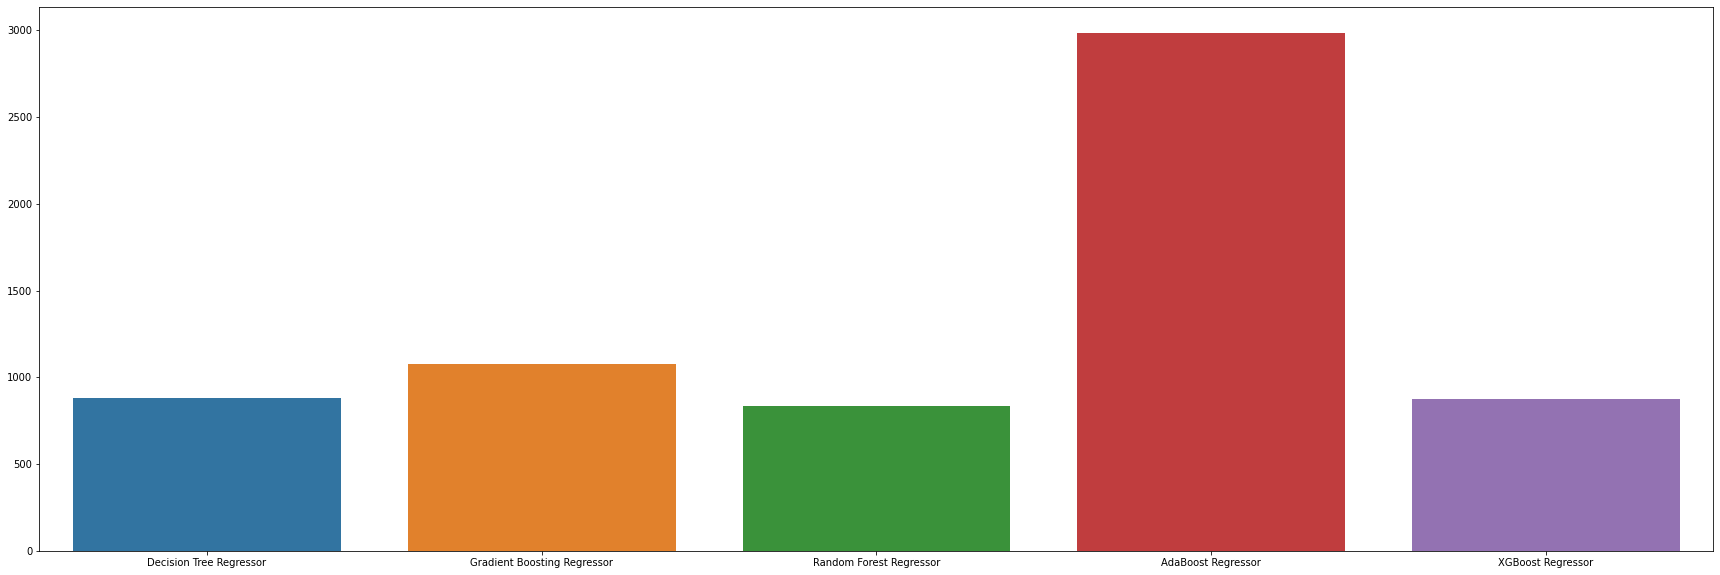

In [133]:



ax = sns.barplot(x = Models, y = train_mse)

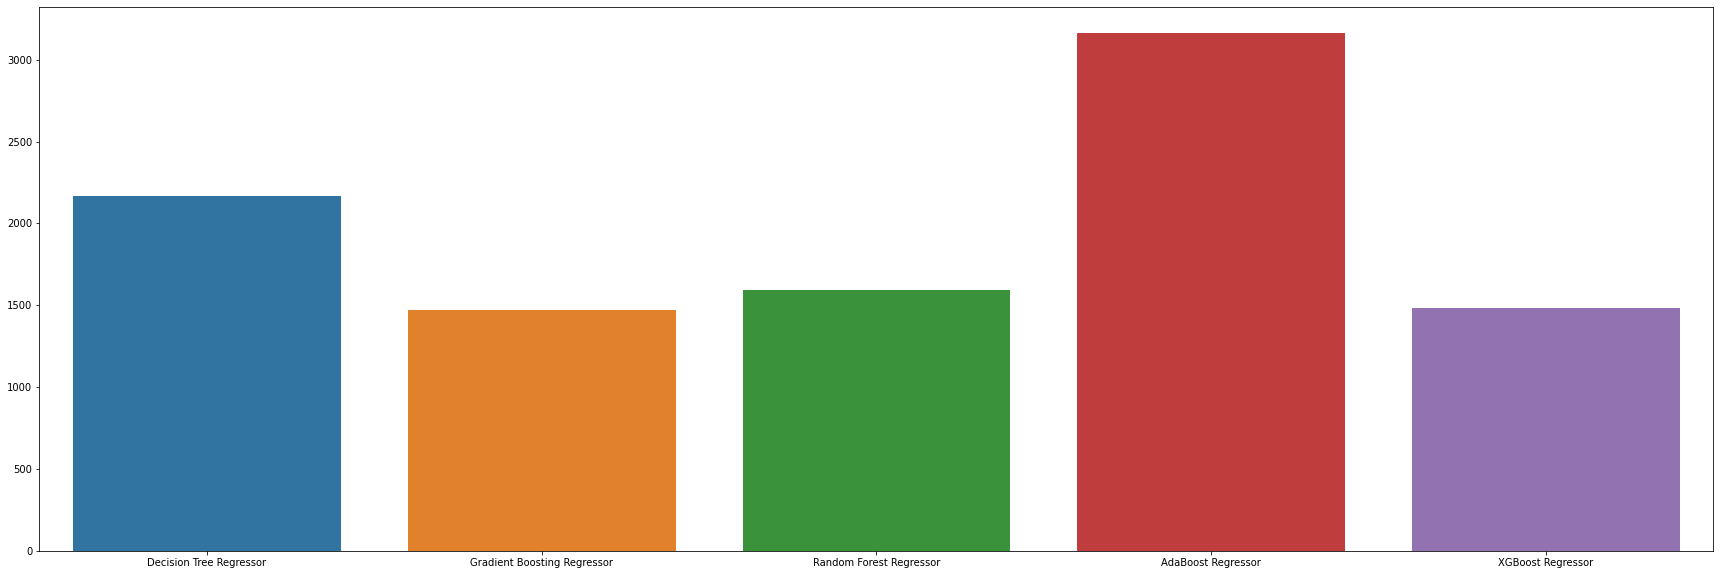

In [134]:


ax = sns.barplot(x = Models, y = test_mse)

Comparing Models using R2 scores:

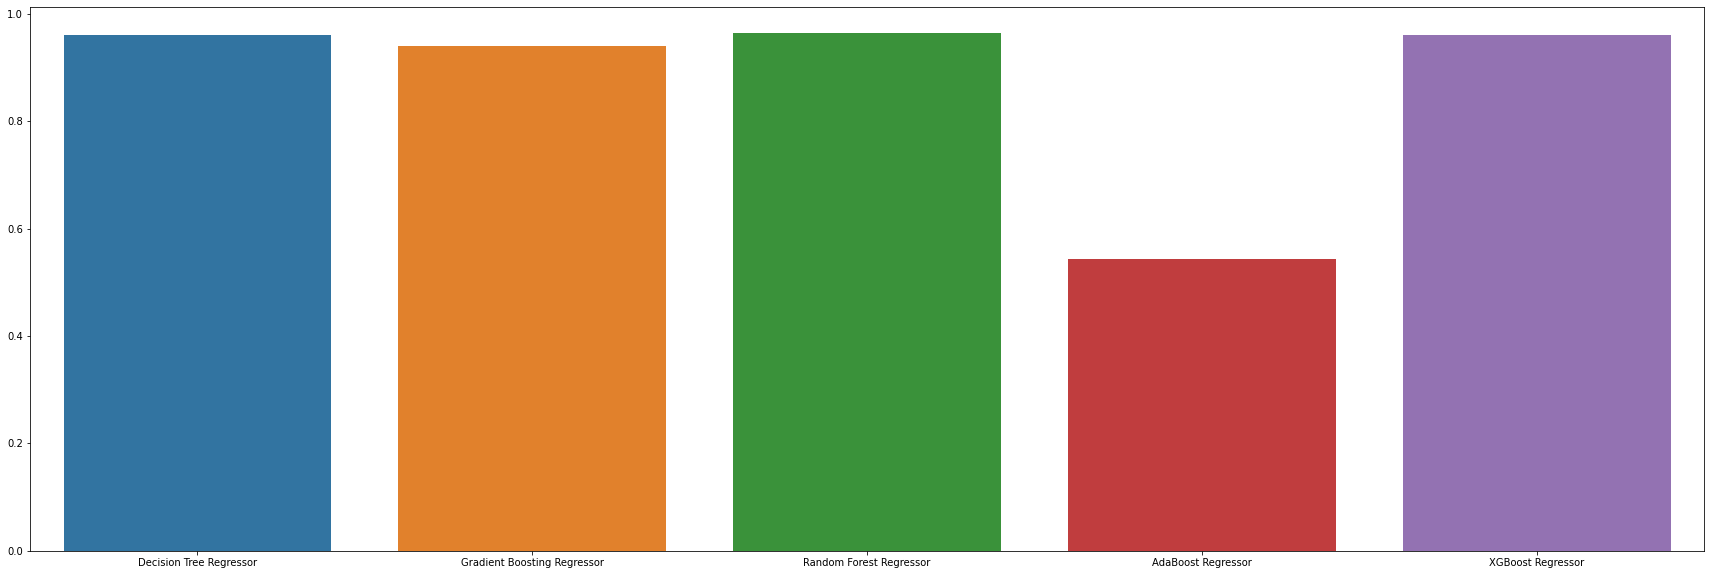

In [135]:

ax = sns.barplot(x = Models, y = train_r2)

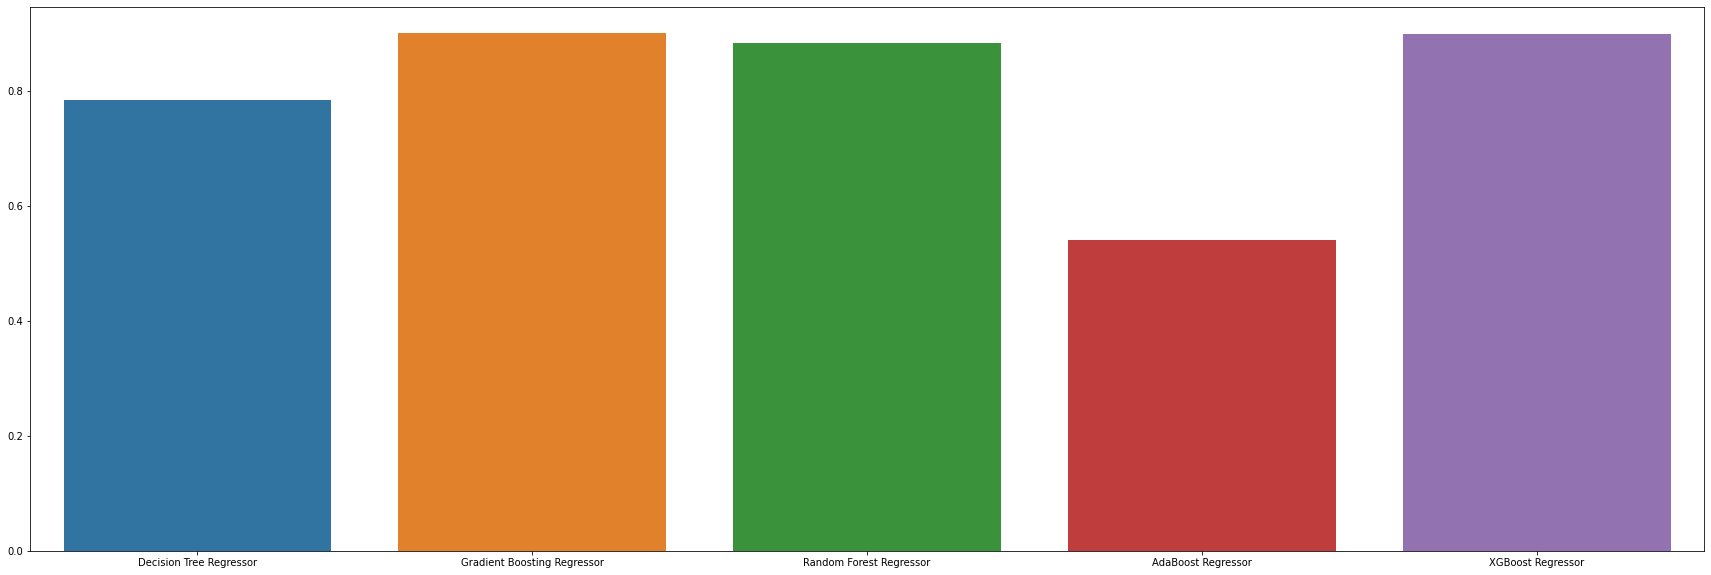

In [136]:

ax = sns.barplot(x = Models, y = test_r2)